In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data
df = pd.read_csv(r'C:\Users\mohmsCorrelations movie data\movies.csv')


In [20]:
# View first 10 rows of data
df.head(10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer             star         country      budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000.0   
2           Leigh Brackett      Mark Hamill   United States  18000000.0   
3             Jim Abrahams      Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000.0   
5            Victor Miller     Betsy Palmer   United States    550000.0   
6              Dan Aykroyd     John Belushi   United States  27000000.0   
7             Jake LaMotta   Robert De Niro   United States  18000000.0   
8             Jerry Siegel     Gene Hackman   United States  54000000.0   
9              Bill Bryden  David Carradine   United States  10000000.0   

         gross                       company  runtime yearcorrect  
0   46998772.0                  Warner Bros.    146.0        1980  
1   58853106.0             Columbia Pictures    104.0        1980  
2  538375067.0                     Lucasfilm    124.0        1980  
3   83453539.0            Paramount Pictures     88.0        1980  
4   39846344.0                Orion Pictures     98.0        1980  
5   39754601.0            Paramount Pictures     95.0        1980  
6  115229890.0            Universal Pictures    133.0        1980  
7   23402427.0  Chartoff-Winkler Productions    129.0        1980  
8  108185706.0                Dovemead Films    127.0        1981  
9   15795189.0                United Artists    100.0        1980

In [11]:
# Identify missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [27]:
# Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object


In [26]:
# Change Budget data type from float to int
df['budget'] = df['budget'].astype('int64')

In [18]:
# Create correct year column
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [53]:
# Sort movies based on gross revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [22]:
#Drop rows with null data
df = df.dropna(how='any',axis=0) 

In [23]:
# Eases navigation 
pd.set_option('display.max_rows', None)

In [ ]:
Factors to consider
#Budget high correlation
#company high correlation

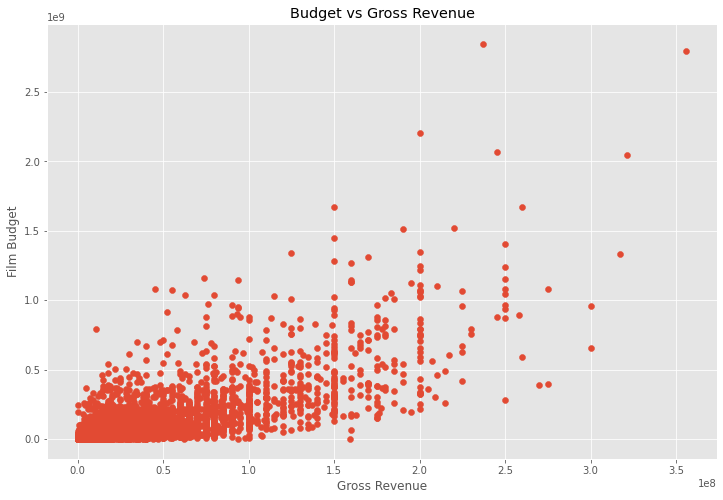

In [33]:
# Scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Film Budget')

plt.show()


In [31]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

             gross                company  runtime yearcorrect  
5445  2.847246e+09  Twentieth Century Fox    162.0        2009  
7445  2.797501e+09         Marvel Studios    181.0        2019  
3045  2.201647e+09  Twentieth Century Fox    194.0        1997  
6663  2.069522e+09              Lucasfilm    138.0        2015  
7244  2.048360e+09         Marvel Studios    149.0        2018

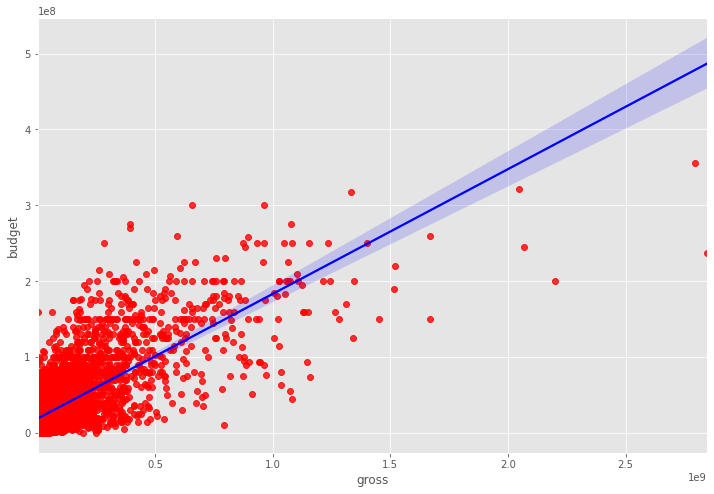

In [36]:
# Plot Budget vs gross using seaborn (linear fit)

sns.regplot(x='gross',y='budget',data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"} )

In [38]:
# Identify correlations in the data (numerical fields only)
df.corr(method='pearson') # Method = Pearson

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [39]:
df.corr(method ='kendall') # Method = kendall

year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000

In [40]:
df.corr(method ='spearman') # Method = spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000

In [ ]:
# High correltation between budget and gross

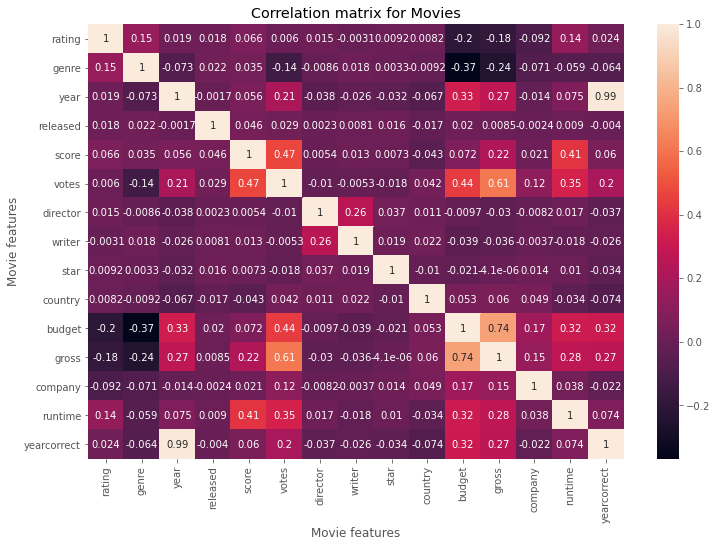

In [57]:
# Correlation Matrix (Pearson)
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [51]:
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  \
5445                                             Avatar       5      0  2009   
7445                                  Avengers: Endgame       5      0  2019   
3045                                            Titanic       5      6  1997   
6663         Star Wars: Episode VII - The Force Awakens       5      0  2015   
7244                             Avengers: Infinity War       5      0  2018   
7480                                      The Lion King       4      2  2019   
6653                                     Jurassic World       5      0  2015   
6043                                       The Avengers       5      0  2012   
6646                                          Furious 7       5      0  2015   
7494                                          Frozen II       4      2  2019   
6644                            Avengers: Age of Ultron       5      0  2015   
7247                                      Black Panther       5      0  2018   
5845       Harry Potter and the Deathly Hallows: Part 2       5      1  2011   
7075            Star Wars: Episode VIII - The Last Jedi       5      0  2017   
7271                     Jurassic World: Fallen Kingdom       5      0  2018   
6262                                             Frozen       4      2  2013   
7072                               Beauty and the Beast       4      7  2017   
7281                                      Incredibles 2       4      2  2018   
7055                            The Fate of the Furious       5      0  2017   
6244                                         Iron Man 3       5      0  2013   
6688                                            Minions       4      2  2015   
6846                         Captain America: Civil War       5      0  2016   
7250                                            Aquaman       5      0  2018   
4245      The Lord of the Rings: The Return of the King       5      0  2003   
7458                          Spider-Man: Far from Home       5      0  2019   
7456                                     Captain Marvel       5      0  2019   
5878                     Transformers: Dark of the Moon       5      0  2011   
6059                                            Skyfall       5      0  2012   
6494                    Transformers: Age of Extinction       5      0  2014   
2448                                      The Lion King       1      2  1994   
6047                              The Dark Knight Rises       5      0  2012   
7463      Star Wars: Episode IX - The Rise of Skywalker       5      0  2019   
7450                                              Joker       6      5  2019   
7488                                        Toy Story 4       1      2  2019   
5685                                        Toy Story 3       1      2  2010   
4852         Pirates of the Caribbean: Dead Man's Chest       5      0  2006   
6869                       Rogue One: A Star Wars Story       5      0  2016   
7481                                            Aladdin       4      1  2019   
5860        Pirates of the Caribbean: on Stranger Tides       5      0  2011   
7140                                    Despicable Me 3       4      2  2017   
2245                                      Jurassic Park       5      0  1993   
6908                                       Finding Dory       4      2  2016   
3451          Star Wars: Episode I - The Phantom Menace       4      0  1999   
5667                                Alice in Wonderland       4      1  2010   
6863                                           Zootopia       4      2  2016   
6045                  The Hobbit: An Unexpected Journey       5      1  2012   
3843              Harry Potter and the Sorcerer's Stone       4      1  2001   
5243                                    The Dark Knight       5      0  2008   
6311                                    Despicable Me 2       4      2  2013   
6905                                    The Jungle 

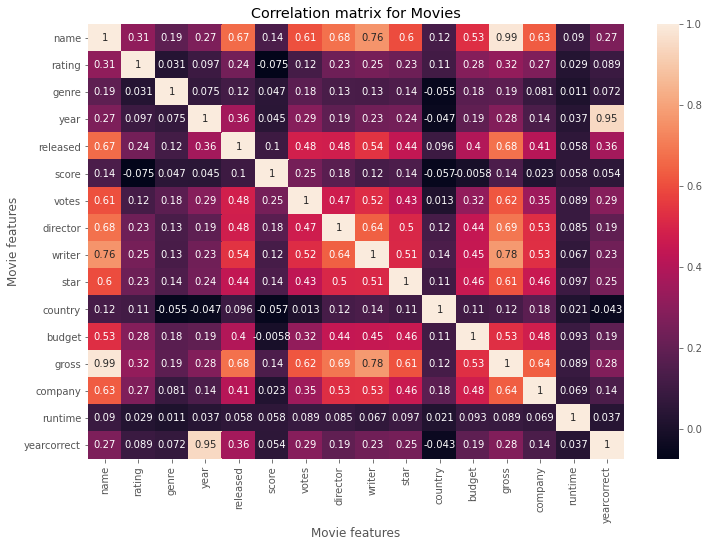

In [55]:
# Correlation Matrix (Pearson)
correlation_matrix = df_numerized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [59]:
#identify correlation per cateogry
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating       rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             yearcorrect    0.023925
genre        rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
 

In [60]:
# Identify correlations in descending order

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.074422
yearcorrect  country       -0.074422
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
yearcorrect  genre         -0.064308
genre        yearcorrect   -0.064308
             runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [62]:
# Identify highest correlations
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
year         yearcorrect    0.990417
yearcorrect  year           0.990417
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Vote and Budget have the highest correlation to movie gross